In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from joblib import dump, load
from MPD import MPD
import figa as figa
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.model_selection import StratifiedShuffleSplit, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import learning_curve,validation_curve
import plotting
from plotting import plot_validation_curve

In [2]:
data = pd.read_csv("checkxss.csv")
y= data['Class']
X=data.drop(labels = ['Class'],axis=1)



In [3]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2)  

Creating an classifier and performing Gridsearch
-----------------------------------------------------

In [4]:
DT_clf = DecisionTreeClassifier()
param_grid = {'max_depth':np.arange(2,20,5), 'min_samples_leaf':np.arange(2,20,5), 'min_samples_split':np.arange(3,20), 'criterion':['gini','entropy']}


In [5]:
grid = GridSearchCV(DT_clf, param_grid, scoring = 'f1')
grid.fit(X_train, y_train)

print("best parameters: ", grid.best_params_)
print("best score: ", grid.best_score_)
print("best estimator: ", grid.best_estimator_)

best parameters:  {'criterion': 'entropy', 'max_depth': 17, 'min_samples_leaf': 2, 'min_samples_split': 13}
best score:  0.9936117714841078
best estimator:  DecisionTreeClassifier(criterion='entropy', max_depth=17, min_samples_leaf=2,
                       min_samples_split=13)


In [6]:
sss=StratifiedShuffleSplit(n_splits=5,test_size=0.2)

Plotting the validation curve:
--------------------------------
1. max_depth
2. min_samples_leaf
3. min_samples_split


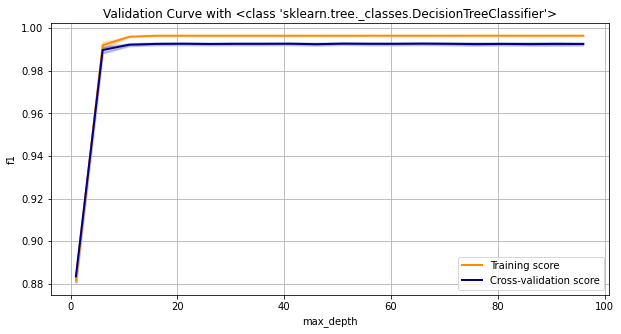

In [7]:
fig1=plot_validation_curve(grid.best_estimator_,X_train,y_train,cv=sss,param_range=np.arange(1,100,5),param_name='max_depth',scoring='f1')

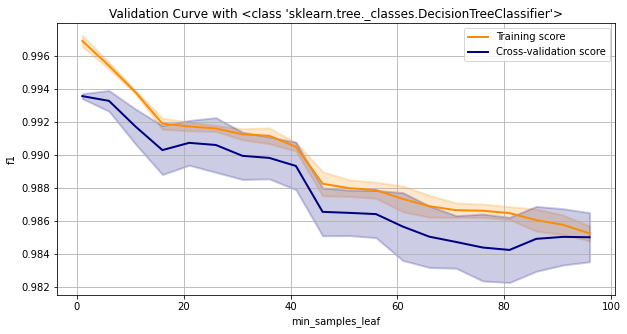

In [8]:
fig2=plot_validation_curve(grid.best_estimator_,X_train,y_train,cv=sss,param_range=np.arange(1,100,5),param_name='min_samples_leaf',scoring='f1')

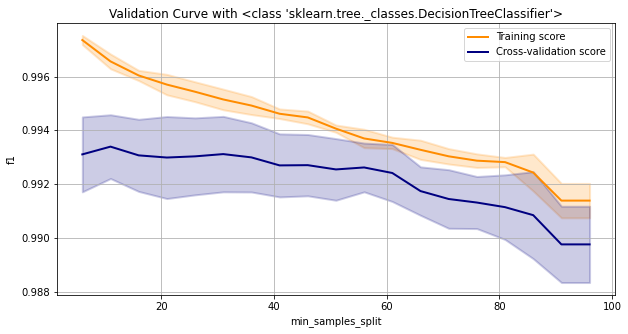

In [9]:
fig3=plot_validation_curve(grid.best_estimator_,X_train,y_train,cv=sss,param_range=np.arange(1,100,5),param_name='min_samples_split',scoring='f1')

Performing MPD from the values obtained and storing them in joblib file
---------------------------------------------------

In [10]:
DT_clf = DecisionTreeClassifier(max_depth = 17,min_samples_leaf=2,min_samples_split=13, criterion='entropy')
mpd = MPD(X_train, y_train, DT_clf, num_bootstrap=100)

dump(mpd, 'xss.joblib') 


['xss.joblib']